In [46]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [13]:
#Importing Dataset
data = pd.read_csv("D:/PARTH SHAH/R/ALY 6020/Module 2 Project/car.csv", na_values=['?'])
data.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [14]:
#Checking Null Values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [15]:
data['Horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [17]:
data.loc[data.Horsepower=='NaN']
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [18]:
#Mean
average = data['Horsepower'].mean()
average

104.46938775510205

In [42]:
#Fill mean values
data['Horsepower'].fillna(average, inplace=True)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [40]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


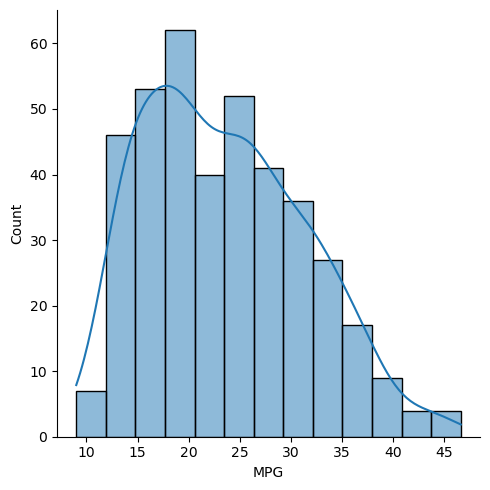

In [39]:
#Distribution of MPG
sns.displot(data["MPG"], kde = True)

<AxesSubplot:>

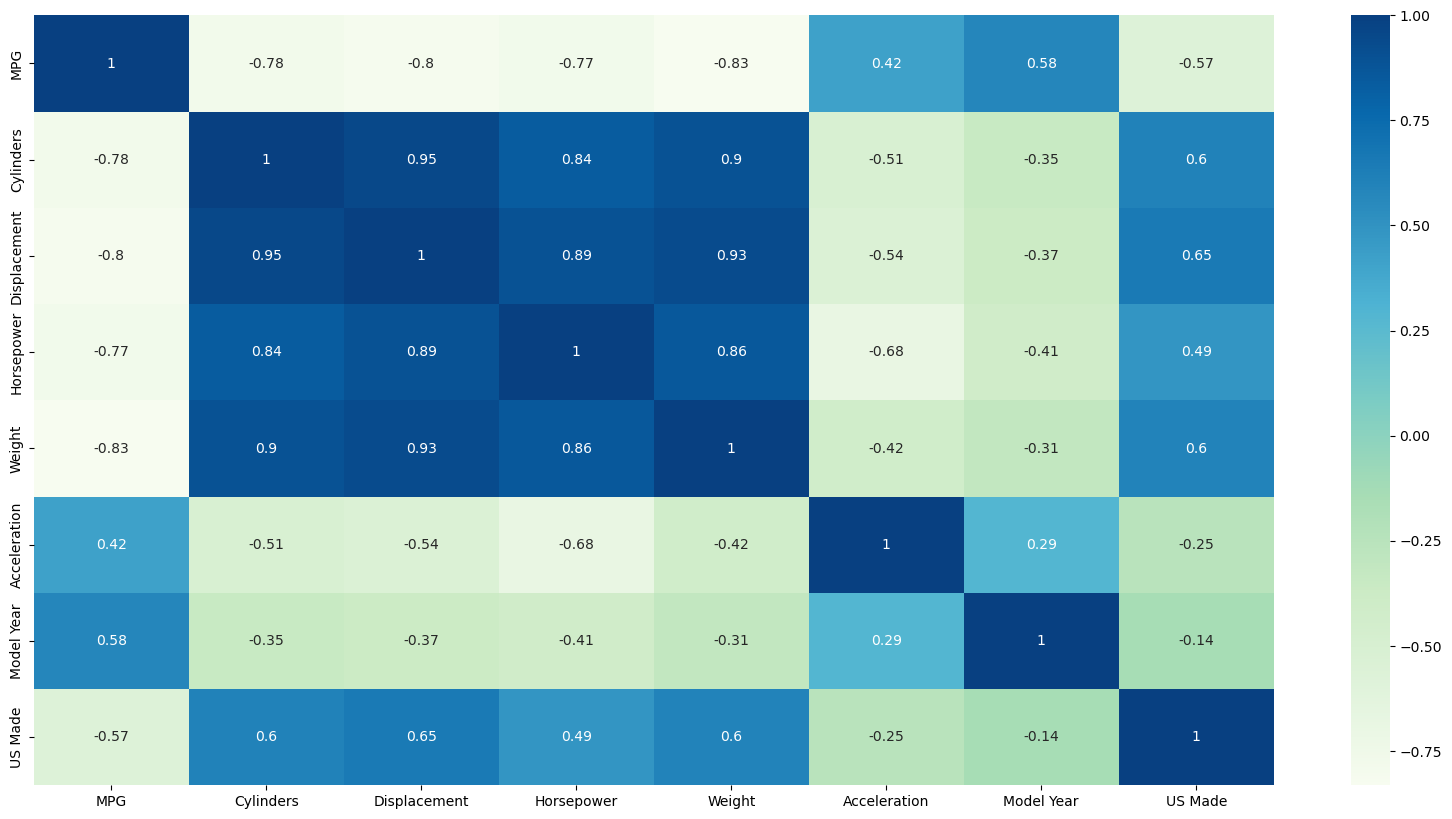

In [25]:
#Correlation Plot
plt.figure(figsize = (20,10))  
sns.heatmap(data.corr(),cmap="GnBu",annot = True)

In [41]:
#splitting dataset
x = data.iloc[:,1:8]
y = data[['MPG']]

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=11)

In [31]:
#Linear regerssion
lm = LinearRegression()
sfs = SFS(lm,
          k_features = 7,
          forward = True,
          floating = False,
          scoring = "r2",
          cv=5,
          n_jobs=-1)

sfs = sfs.fit(x_train,y_train)
sfs

pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.7514950539171075, 0.6899351490270255, 0.695...",0.702195,"(Weight,)",0.035296,0.027462,0.013731
2,"(3, 5)","[0.8423667663456691, 0.8078997374250196, 0.807...",0.81061,"(Weight, Model Year)",0.021932,0.017064,0.008532
3,"(3, 5, 6)","[0.8585577035793526, 0.819867964706962, 0.7977...",0.819456,"(Weight, Model Year, US Made)",0.027244,0.021197,0.010598
4,"(1, 3, 5, 6)","[0.8604162462029418, 0.8229943575175207, 0.801...",0.822332,"(Displacement, Weight, Model Year, US Made)",0.026227,0.020406,0.010203
5,"(1, 2, 3, 5, 6)","[0.860313423830177, 0.8148345859748004, 0.8019...",0.821868,"(Displacement, Horsepower, Weight, Model Year,...",0.026082,0.020293,0.010147
6,"(1, 2, 3, 4, 5, 6)","[0.8644098636268109, 0.8088911790378264, 0.796...",0.8213,"(Displacement, Horsepower, Weight, Acceleratio...",0.030102,0.023421,0.01171
7,"(0, 1, 2, 3, 4, 5, 6)","[0.8614543786498171, 0.8088819476681893, 0.794...",0.819964,"(Cylinders, Displacement, Horsepower, Weight, ...",0.029333,0.022822,0.011411


In [43]:
#Best Model
x = data[['Displacement', 'Horsepower','Weight','Model Year','US Made']]
y = data[['MPG']]

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=11)

x = sm.add_constant(x_train)
est = sm.OLS(y_train,x).fit()
print(est.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     301.7
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          3.46e-117
Time:                        22:35:46   Log-Likelihood:                -822.73
No. Observations:                 318   AIC:                             1657.
Df Residuals:                     312   BIC:                             1680.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.2685      4.418     -3.004   

In [45]:
#Accuracy of model
lm.fit(x_train, y_train)
lm.score(x_train,y_train)

0.8286412766056341

In [36]:
x = data[['Displacement','Weight','Model Year','US Made']]
y = data[['MPG']]

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=11)

x = sm.add_constant(x_train)
est = sm.OLS(y_train,x).fit()
print(est.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     373.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          8.01e-118
Time:                        22:09:56   Log-Likelihood:                -824.32
No. Observations:                 318   AIC:                             1659.
Df Residuals:                     313   BIC:                             1677.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.1514      4.303     -3.521   